In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Importing the dataset

In [7]:
dataset = sklearn.datasets.load_boston()

In [12]:
house_price_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [13]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
house_price_df['price'] = dataset.target

In [15]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
house_price_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [21]:
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between the various features of the dataset

In [22]:
corln = house_price_df.corr()

Heat Map

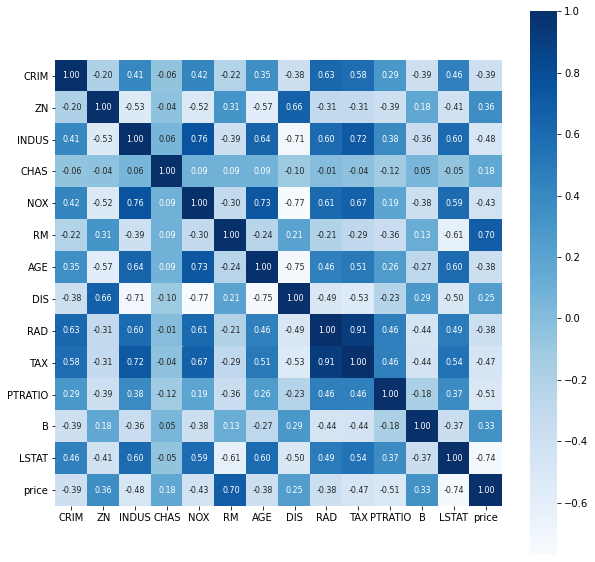

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corln, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the dataset


In [26]:
X = house_price_df.drop('price', axis=1)

In [27]:
Y = house_price_df['price']

In [28]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [31]:
X_train.shape

(404, 13)

In [32]:
X_test.shape

(102, 13)

Model Training

#XGBRegressor

In [35]:
#loading the model
model = XGBRegressor()

In [37]:
model.fit(X_train,Y_train)

[00:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Model Prediction on training data

In [41]:
# Accuracy for the prediction on training value
training_data_prediction = model.predict(X_train)

In [52]:
#MAE
score_1 = metrics.mean_absolute_error(training_data_prediction,Y_train)

In [53]:
score_1

1.145314053261634

In [54]:
#R square error
score_2 = metrics.r2_score(training_data_prediction,Y_train)

In [55]:
score_2

0.9711526796929283

#TEST DATA

In [58]:
testing_data_prediction = model.predict(X_test)
score_3 = metrics.mean_absolute_error(testing_data_prediction,Y_test)
score_4 = metrics.r2_score(testing_data_prediction,Y_test)

In [59]:
score_3

1.9922956859364223

In [60]:
score_4

0.9028193795196178

#VISUALIZING THE DATA

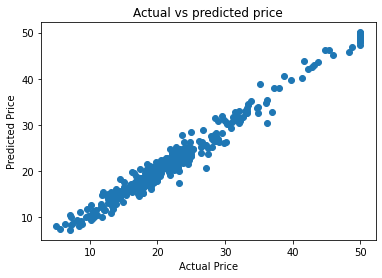

In [62]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted price")
plt.show()

#RANDOM FOREST METHOD

In [67]:
model2 = RandomForestRegressor()

In [68]:
model2.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
model2_training_res = model2.predict(X_train)

In [71]:
#r square
score_rf = metrics.r2_score(model2_training_res, Y_train)

#mae score
score_rf_mae = metrics.mean_absolute_error(model2_training_res, Y_train)

In [72]:
score_rf

0.9801744614398685

In [73]:
score_rf_mae

0.8301930693069299

In [76]:
model2_test_res = model2.predict(X_test)
#r square
score_rf_test = metrics.r2_score(model2_test_res, Y_test)

#mae score
score_rf_mae_test = metrics.mean_absolute_error(model2_test_res, Y_test)

In [77]:
score_rf_test

0.8815845549556273

In [78]:
score_rf_mae_test

2.067196078431371

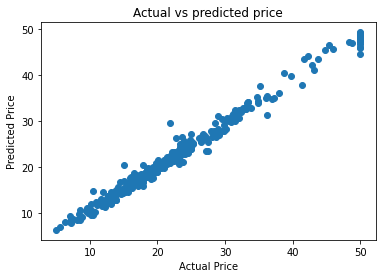

In [79]:
plt.scatter(Y_train, model2_training_res)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs predicted price")
plt.show()

In [81]:
training_data_prediction

array([23.360205 , 22.462858 , 20.84804  , 33.77895  , 15.333282 ,
       13.616525 , 21.71274  , 15.175322 , 11.724756 , 21.836252 ,
       16.08508  ,  7.52517  , 31.094206 , 48.56228  , 32.623158 ,
       20.546066 , 22.177324 , 20.500404 , 31.666502 , 20.551508 ,
       25.74269  ,  8.247894 , 45.200817 , 22.069397 , 20.698004 ,
       20.100042 , 19.873472 , 26.242834 , 23.39618  , 31.927258 ,
       21.493471 ,  9.280926 , 18.504272 , 21.87202  , 12.504413 ,
       10.578829 , 13.054951 , 23.541336 , 19.164755 , 15.888303 ,
       23.768887 , 28.454714 , 15.539753 , 18.049202 , 16.23671  ,
       14.08383  , 25.33273  , 17.575668 , 49.566467 , 16.990675 ,
       21.738977 , 32.935143 , 16.125738 , 22.45393  , 20.776966 ,
       20.042227 , 22.898897 , 38.124043 , 30.607079 , 32.607468 ,
       20.919416 , 47.348038 , 14.524615 ,  8.126455 , 19.581661 ,
        9.030508 , 26.462107 , 17.69918  , 20.546162 , 46.312218 ,
       39.689137 , 34.387108 , 22.11083  , 34.568977 , 24.8739

In [82]:
model2_training_res

array([23.561, 21.022, 21.465, 35.221, 15.062, 14.629, 21.588, 14.667,
       12.363, 21.828, 14.101,  7.042, 29.08 , 44.522, 33.834, 20.747,
       22.526, 19.747, 32.923, 19.66 , 26.751,  8.723, 45.665, 21.629,
       23.539, 19.381, 20.109, 25.805, 22.539, 32.072, 19.52 ,  9.126,
       18.353, 21.185, 12.584, 10.348, 12.31 , 23.938, 19.393, 15.114,
       24.067, 27.21 , 15.251, 17.059, 15.621, 13.789, 25.221, 17.059,
       48.742, 17.893, 21.433, 32.315, 16.549, 22.854, 19.759, 19.065,
       22.755, 35.022, 30.154, 32.975, 21.663, 46.745, 13.924,  6.388,
       18.796,  9.737, 26.519, 18.736, 20.681, 46.407, 39.823, 34.074,
       20.965, 34.112, 25.065, 48.997, 13.343, 18.348, 19.725, 22.523,
       48.399, 23.783, 25.025, 22.137, 43.516, 17.915, 31.274, 35.093,
        8.017, 20.012, 18.93 , 12.469, 24.484, 47.693, 36.144, 21.567,
       37.735, 18.029, 15.586, 28.386, 21.847, 19.898, 18.059, 19.368,
       19.351, 21.941, 20.675, 33.152, 20.581, 13.184, 19.115, 20.897,
      

In [83]:
Y_train

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: price, Length: 404, dtype: float64